In [1]:
import ipywidgets as ipw
from IPython.display import display

from stochastic_repro import start_pool
from stochastic_models import model_lorentz
from stochastic_tests import Test

t_fin = 5.0
num_steps = 100

test = Test(model=model_lorentz(),
            t_fin=t_fin,
            num_steps=num_steps,
            sample_times=[t_fin / num_steps * i for i in range(1, num_steps + 1)],
            trials=[10, 100, 1000, 10000],
            stochastic=True)

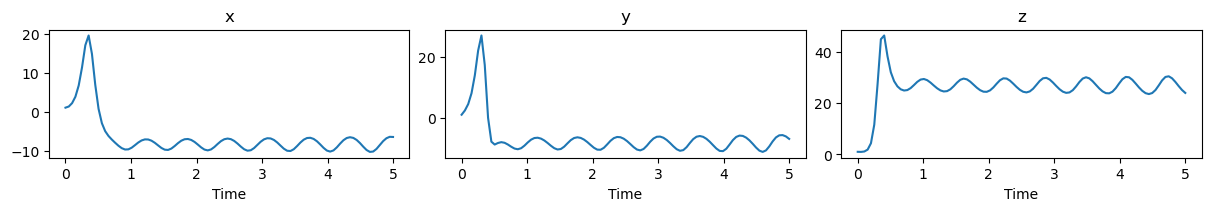

In [2]:
test.execute_deterministic()
_ = test.plot_results_deterministic()

Stochastic simulation results can be treated as a distribution with statistical properties such as mean and standard deviation. Distributions should become smooth with increasing number of trials. 

In [3]:
label, out = ipw.Label(), ipw.Output()
display(out)
with out:
    display(label)

start_pool()
test.execute_stochastic(label)
_ = out.clear_output()

Output()

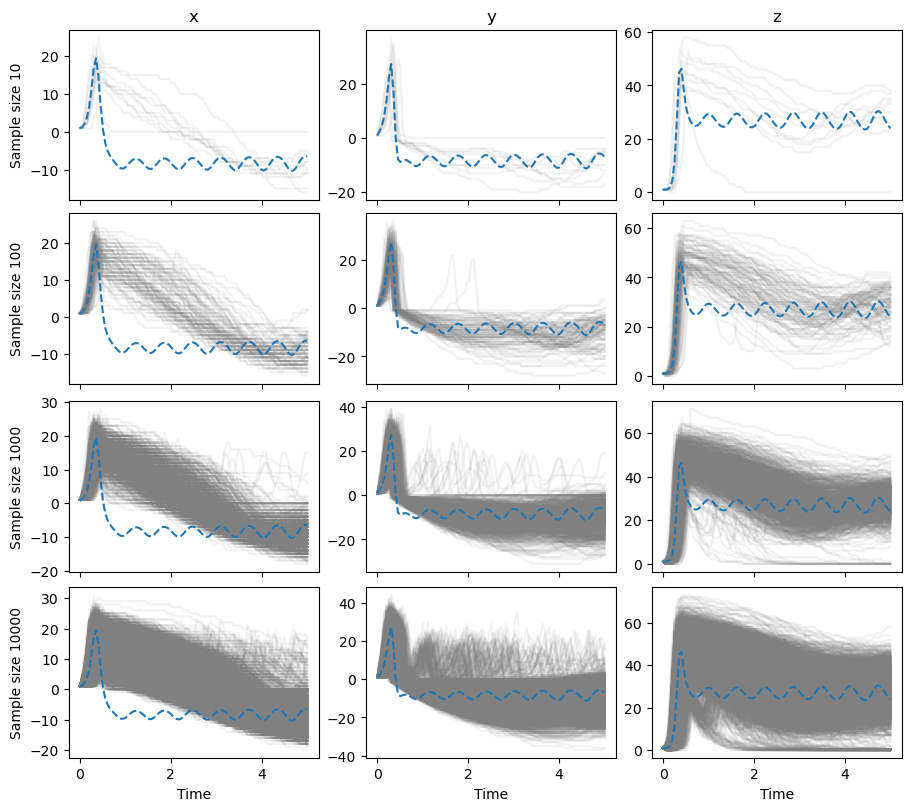

In [4]:
_ = test.plot_results_stochastic()

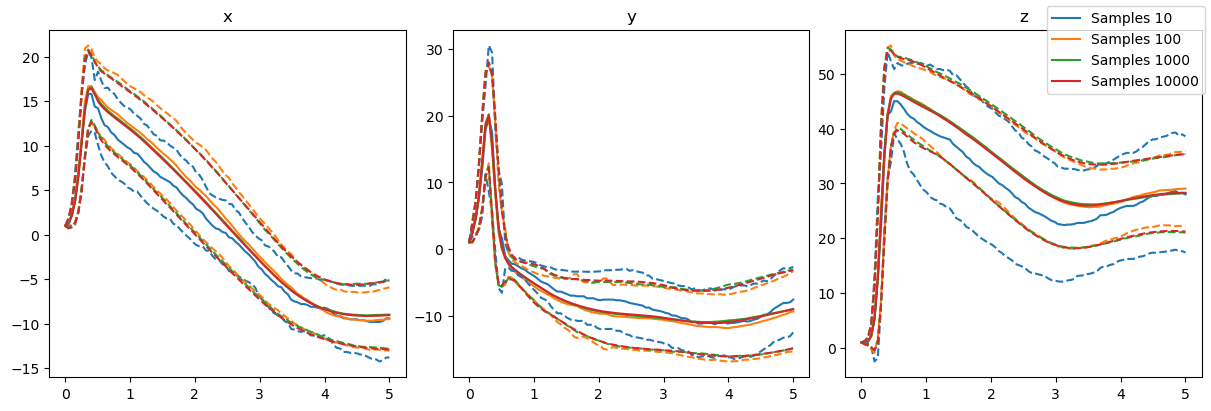

In [5]:
_ = test.plot_stats()

If we bin replicate results at each sample time, we should find that the probability distribution function of a variable at each time point converges with increasing number of replicates. 

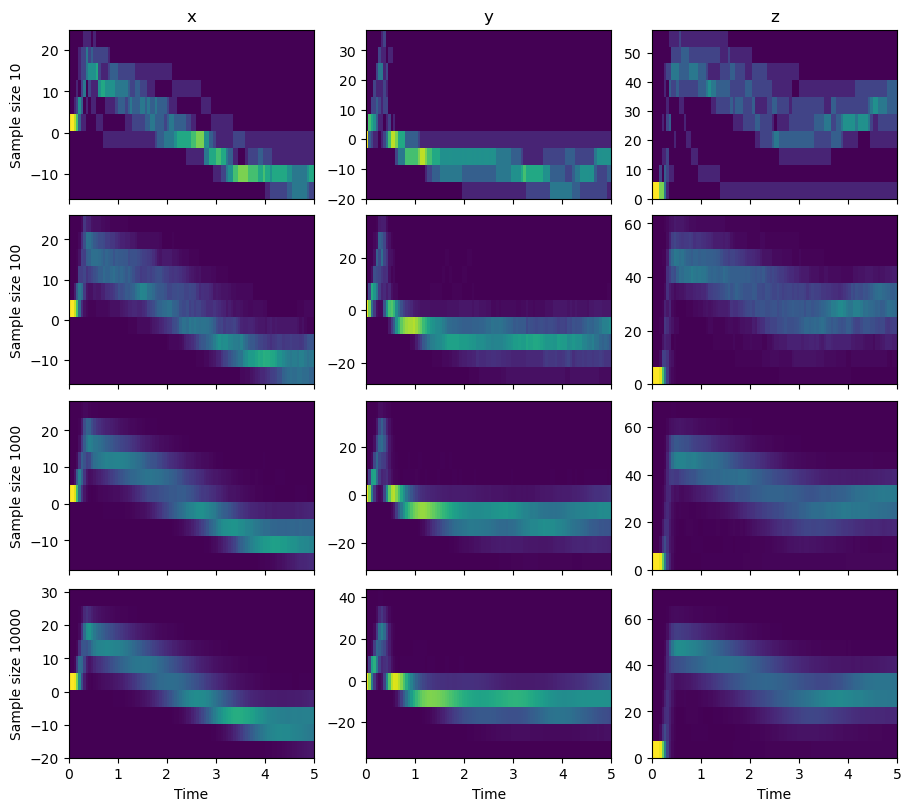

In [6]:
_ = test.plot_distributions()

Results distributions should converge as the number of trials increases. At any sampled simulation time, convergence appears as a distribution that converges with increasing number of trials. Convergence can be quantified by measuring the change in distribution for an increase in number of trials. We should find that the change in distribution goes to zero everywhere as the number of trials increases. 

In [7]:
test.find_ecfs()
test.measure_ecf_diffs()

In [8]:
for t in test.trials:
    ecf_ks_stat_t = {n: -1 for n in test.model.results_names}
    for ks in test.ecf_ks_stat[t]:
        for n, ks_stat in ks.items():
            ecf_ks_stat_t[n] = max(ecf_ks_stat_t[n], ks_stat)
    print(f'{t} trials')
    for n, ks_stat in ecf_ks_stat_t.items():
        print(f'\t{n}: {ks_stat}')

10 trials
	x: 1.4944024610943318
	y: 1.7033787760736971
	z: 1.7883272952470677
100 trials
	x: 0.516566224518474
	y: 0.6946799128492779
	z: 0.6523532121848765
1000 trials
	x: 0.19440338009296979
	y: 0.1719191445154536
	z: 0.18624692293357265
10000 trials
	x: 0.06228346102074003
	y: 0.05098301135355729
	z: 0.05909388213301853


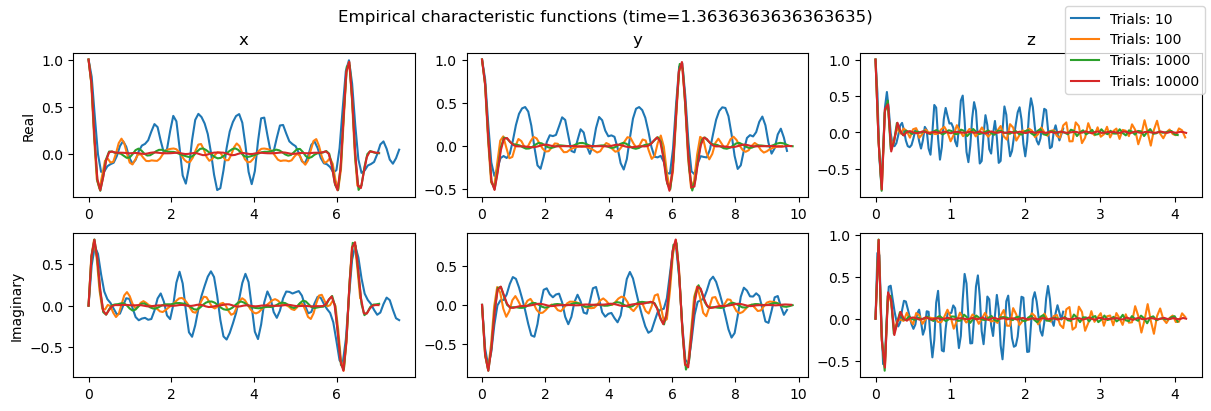

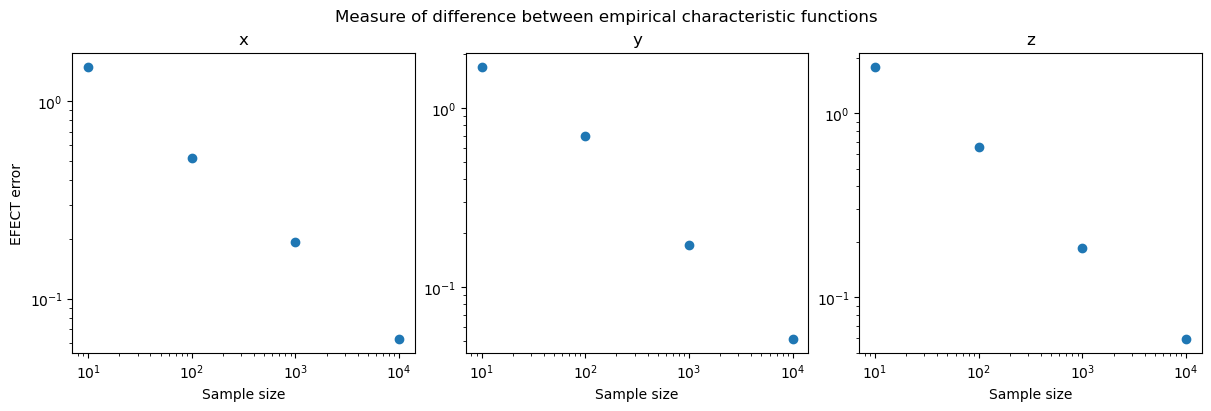

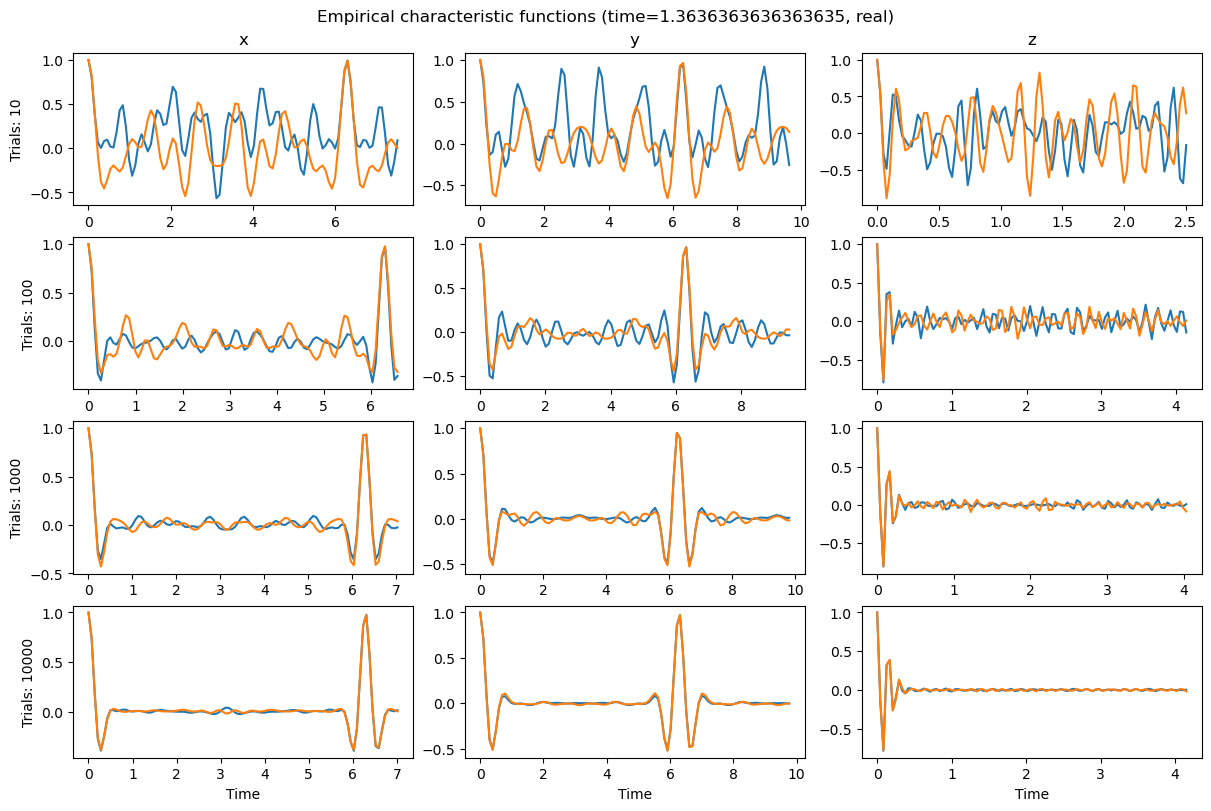

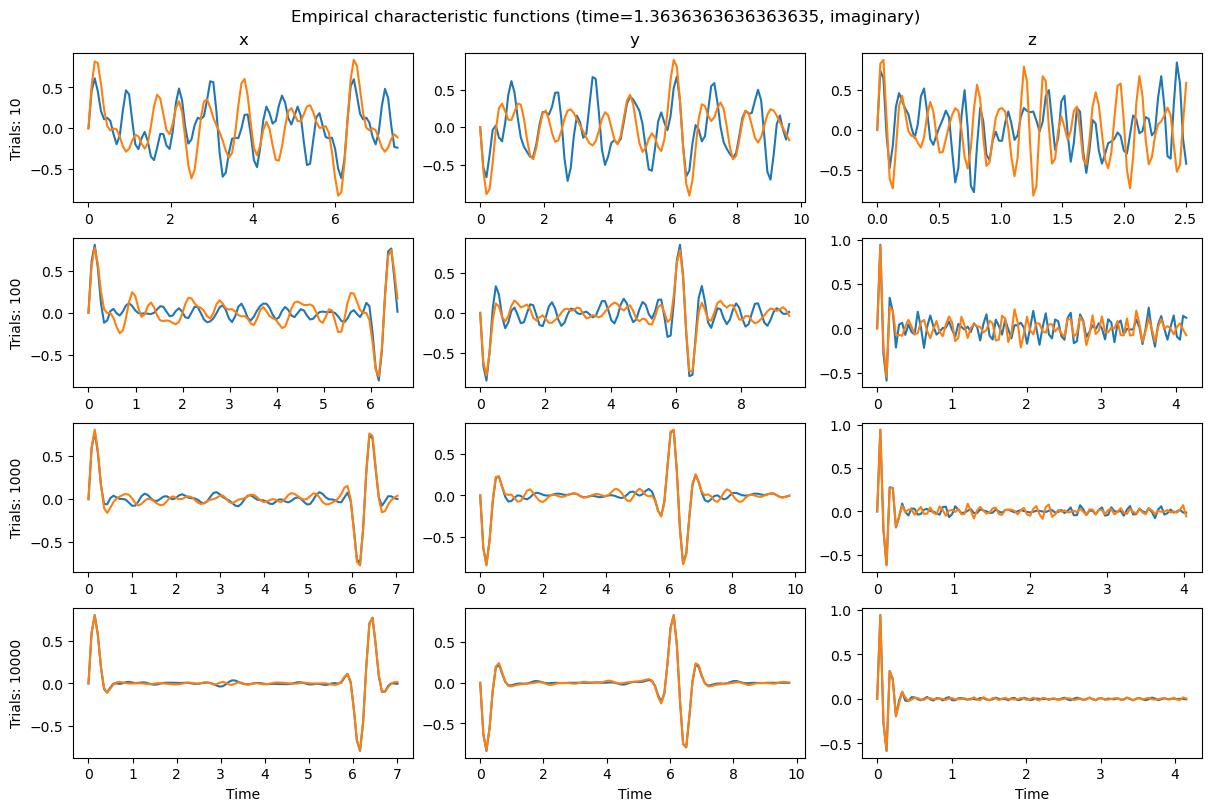

In [9]:
preview_time = test.max_ks_stat_time(test.trials[-1])
# preview_time = test.min_final_eval_time(test.trials[-1])

test.plot_ecf(time=preview_time)
test.plot_ecf_diffs()
_ = test.plot_ecf_comparison(time=preview_time)

In [10]:
test.generate_ecf_diff_fits()

/home/timothy.sego/PycharmProjects/ssr_project_2024/code/stochastic_repro.py:994: OptimizeWarning: Covariance of the parameters could not be estimated
  return curve_fit(fit_func, data_x, data_y, **kwargs)


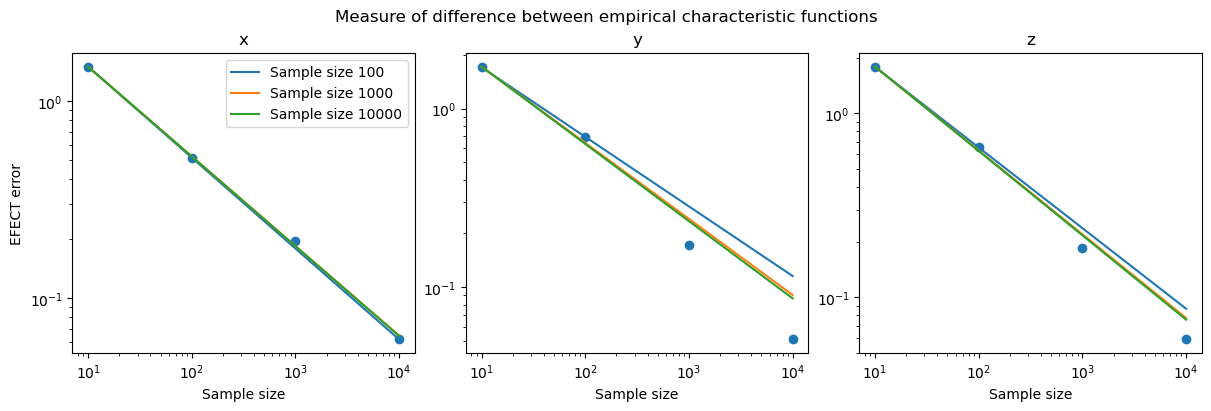

In [11]:
_, axs = test.plot_ecf_diff_fits(test.plot_ecf_diffs())
_ = axs[0].legend()

In [12]:
# Runtime: ~7 minutes (M1 max)
test.test_sampling(err_thresh=1E-3)

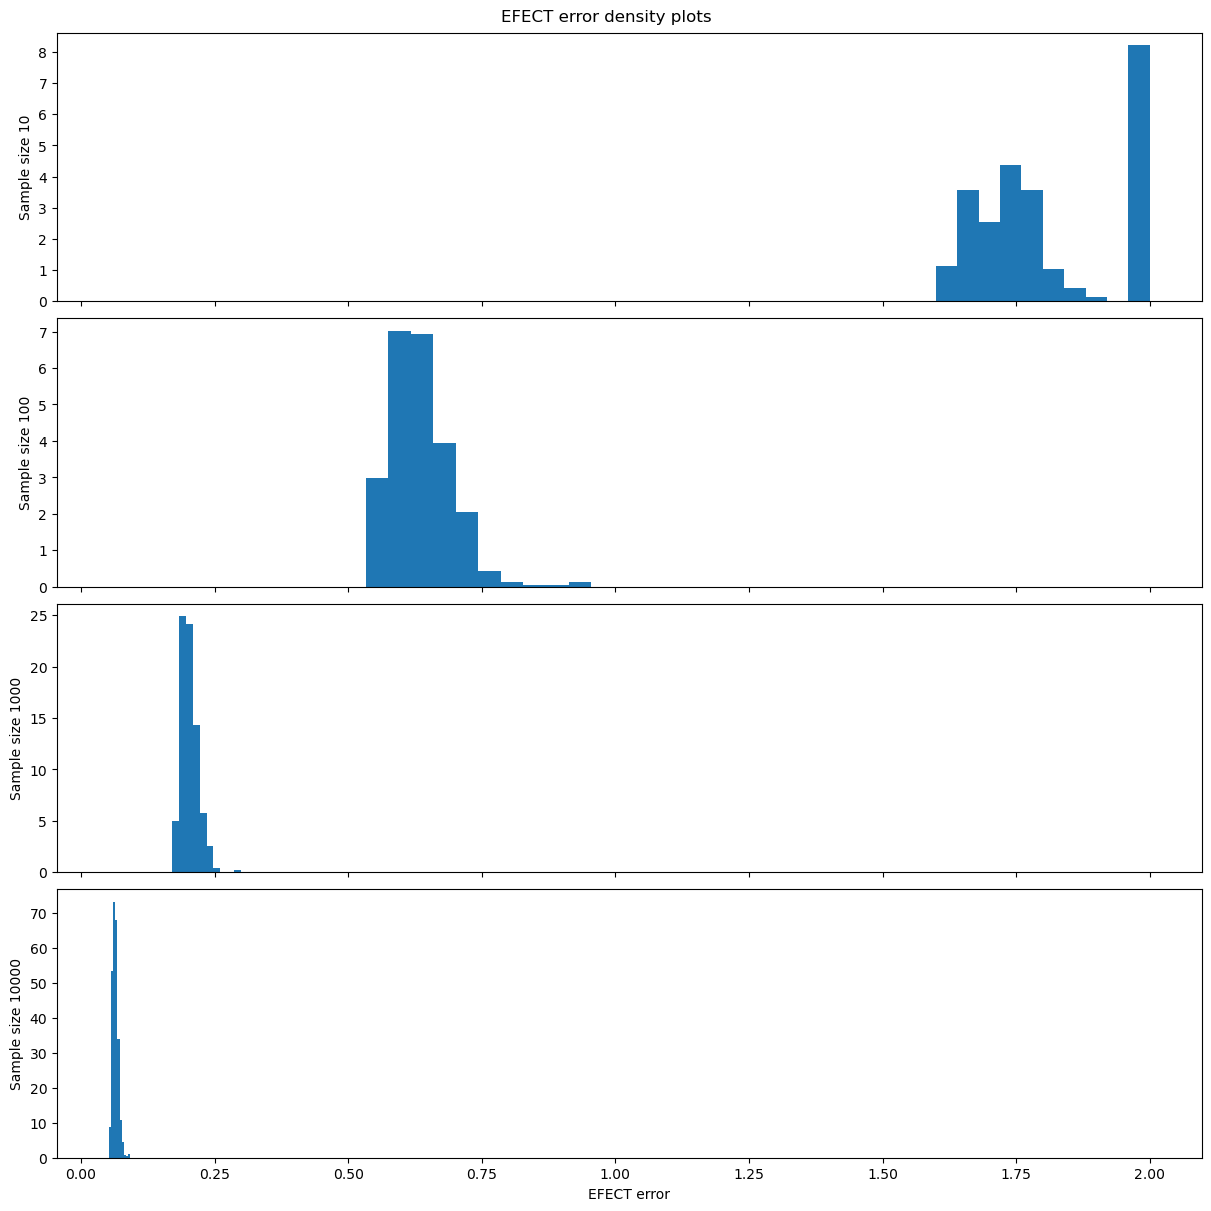

In [13]:
_ = test.plot_ks_sampling()

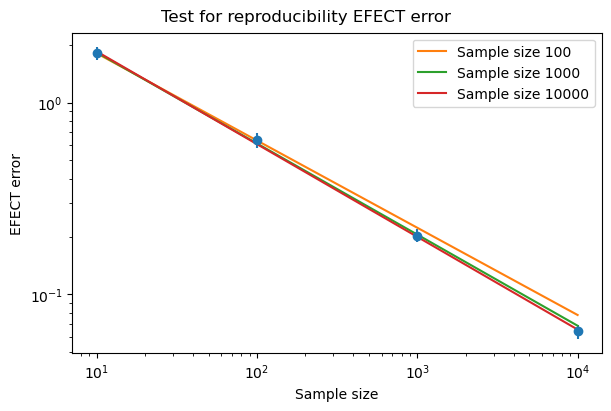

In [14]:
test.generate_ecf_sampling_fits()
_, ax = test.plot_ecf_sampling_fits(test.plot_ecf_sampling())
_ = ax.legend()